In [ ]:
url = "https://github.com/bdemeshev/webinar_forecast_ts_2021/raw/main/monthly_marriages_2020.csv"

Всем большой большой привет :)

Можно запустить Rstudio

Можно запустить в гугл-колабе

colab.to/r

In [ ]:
install.packages(c("fable", "feasts", "rio", "tsibble"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘warp’, ‘slider’




# Кратко о ETS модели

Error + Trend + Seasonality

Мир без случайностей :)

$b_t$ — наклон в момент $t$

$s_t$ — сезонный эффект в $t$

$l_t$ ­­— ряд очищенный от сезонных эффектов

$y_t$ — исходный ряд

ETS(AAA) без случайностей

$b_t = b_{t-1}$

$s_t = s_{t-12}$

$l_t = l_{t-1} + b_{t-1}$

$y_t = l_{t-1} + b_{t-1} + s_{t-12}$

ETS(AAA) со случайностями

$u_t \sim N(0; \sigma^2)$

$b_t = b_{t-1} + \beta u_t$

$s_t = s_{t-12} + \gamma u_t$

$l_t = l_{t-1} + b_{t-1} + \alpha u_t$

$y_t = l_{t-1} + b_{t-1} + s_{t-12} + u_t$

In [ ]:
library(fable) # простые модели ETS/ARIMA/...
library(feasts) # графики
library(rio) # экспорт-импорт данных
library(tidyverse) # манипуляции с данными
library(tsibble) # современный формат хранения рядов
library(lubridate) # работа с датами 

In [ ]:
marr = import(url)

In [ ]:
head(marr)

,region,marriages,date
,<chr>,<int>,<date>
1,643 Российская Федерация,55509,2006-01-01
2,643 Российская Федерация,59495,2007-01-01
3,643 Российская Федерация,58668,2008-01-01
4,643 Российская Федерация,65507,2009-01-01
5,643 Российская Федерация,62980,2010-01-01
6,643 Российская Федерация,57949,2011-01-01


In [ ]:
unique(marr$region)

In [ ]:
rf = filter(marr, region == "643 Российская Федерация")

In [ ]:
rf2 = select(rf, -region)

In [ ]:
glimpse(rf2)

Rows: 180
Columns: 2
$ marriages <int> 55509, 59495, 58668, 65507, 62980, 57949, 55008, 56123, 592…
$ date      <date> 2006-01-01, 2007-01-01, 2008-01-01, 2009-01-01, 2010-01-01…


In [ ]:
# отберем верхушку набора данных
rf_bis = head(marr, 12 * (2020 - 2005))

In [ ]:
rf3 = mutate(rf2, date = yearmonth(date))

In [ ]:
data = as_tsibble(rf3, index = date)

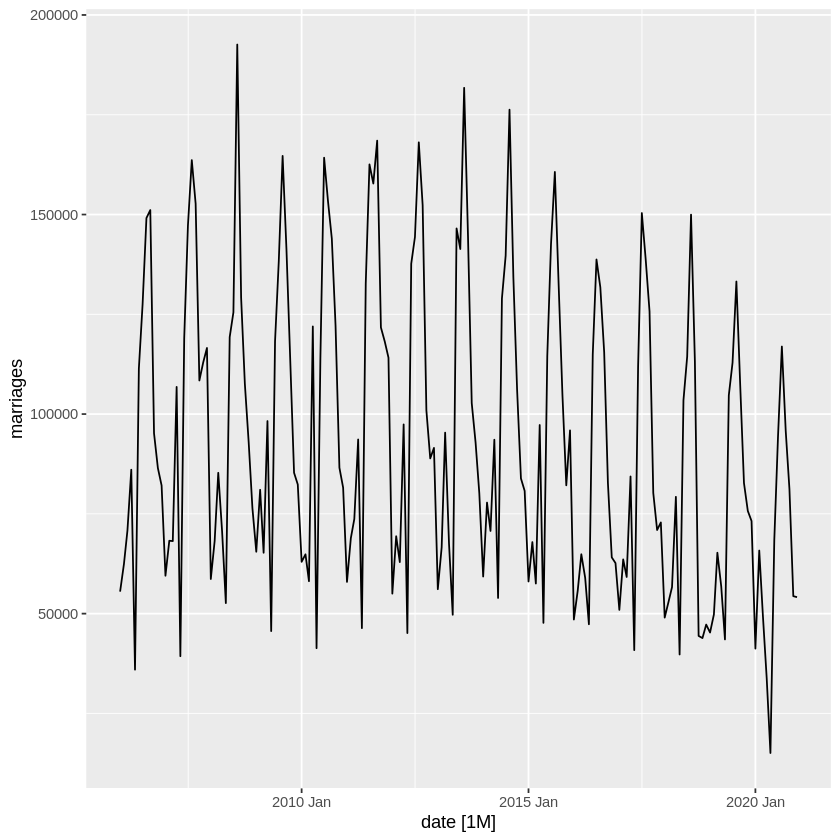

In [ ]:
autoplot(data, marriages)

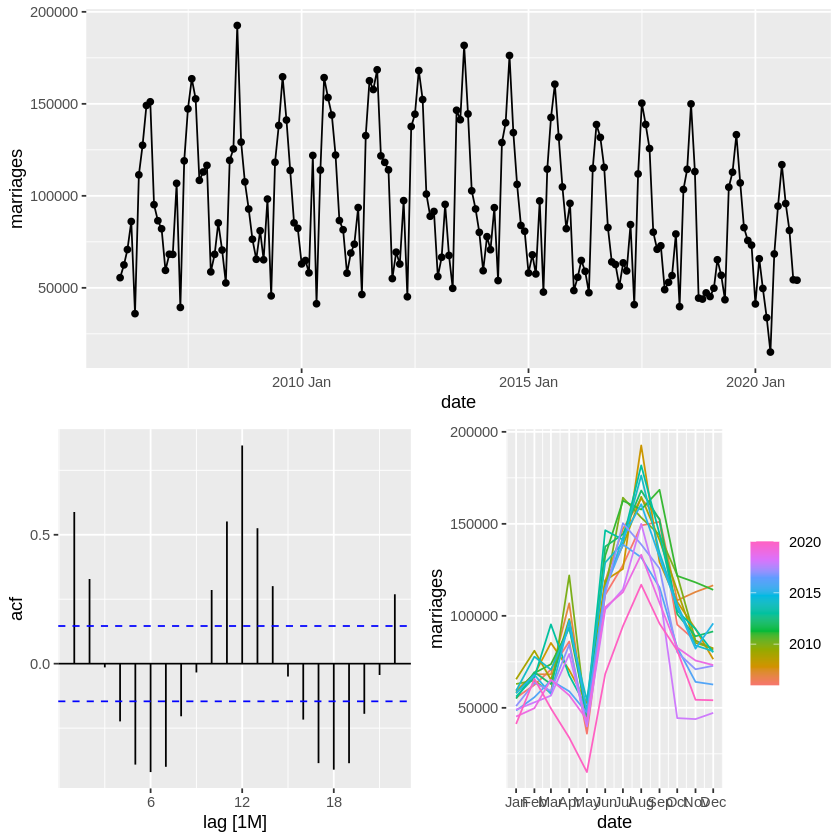

In [ ]:
gg_tsdisplay(data, marriages)

In [ ]:
train = filter(data, date < ymd('2019-01-01'))

Warning message in mask$eval_all_filter(dots, env_filter):
“Incompatible methods ("<.vctrs_vctr", "<.Date") for "<"”


In [ ]:
tail(train)

marriages,date
<int>,<mth>
114416,2018 Jul
149966,2018 Aug
113178,2018 Sep
44413,2018 Oct
43870,2018 Nov
47252,2018 Dec


In [ ]:
# fable + modeltime + forecastML
mod_table = model(train, 
  simple = SNAIVE(marriages),
  aaa = ETS(marriages ~ error('A') + trend('A') + season('A')),
  ln_aaa = ETS(log(marriages) ~ error('A') + trend('A') + season('A')))

In [ ]:
select(mod_table, aaa) %>% report()

Series: marriages 
Model: ETS(A,A,A) 
  Smoothing parameters:
    alpha = 0.1553983 
    beta  = 0.007089094 
    gamma = 0.0001002107 

  Initial states:
     l        b        s1        s2       s3       s4       s5       s6
 94332 1006.792 -11610.57 -9271.104 5839.619 42794.43 63341.91 45270.36
       s7        s8        s9       s10       s11       s12
 24890.14 -51336.48 -8335.827 -29630.52 -30799.97 -41151.98

  sigma^2:  148473421

     AIC     AICc      BIC 
3740.179 3744.614 3792.027 


In [ ]:
fcst = forecast(mod_table, h = "2 years")
fcst

.model,date,marriages,.mean
<chr>,<mth>,<dist>,<dbl>
simple,2019 Jan,"N(49005, 2.5e+08)",49005.00
simple,2019 Feb,"N(52972, 2.5e+08)",52972.00
simple,2019 Mar,"N(56637, 2.5e+08)",56637.00
simple,2019 Apr,"N(79258, 2.5e+08)",79258.00
simple,2019 May,"N(39756, 2.5e+08)",39756.00
simple,2019 Jun,"N(1e+05, 2.5e+08)",103451.00
simple,2019 Jul,"N(114416, 2.5e+08)",114416.00
simple,2019 Aug,"N(149966, 2.5e+08)",149966.00
simple,2019 Sep,"N(113178, 2.5e+08)",113178.00


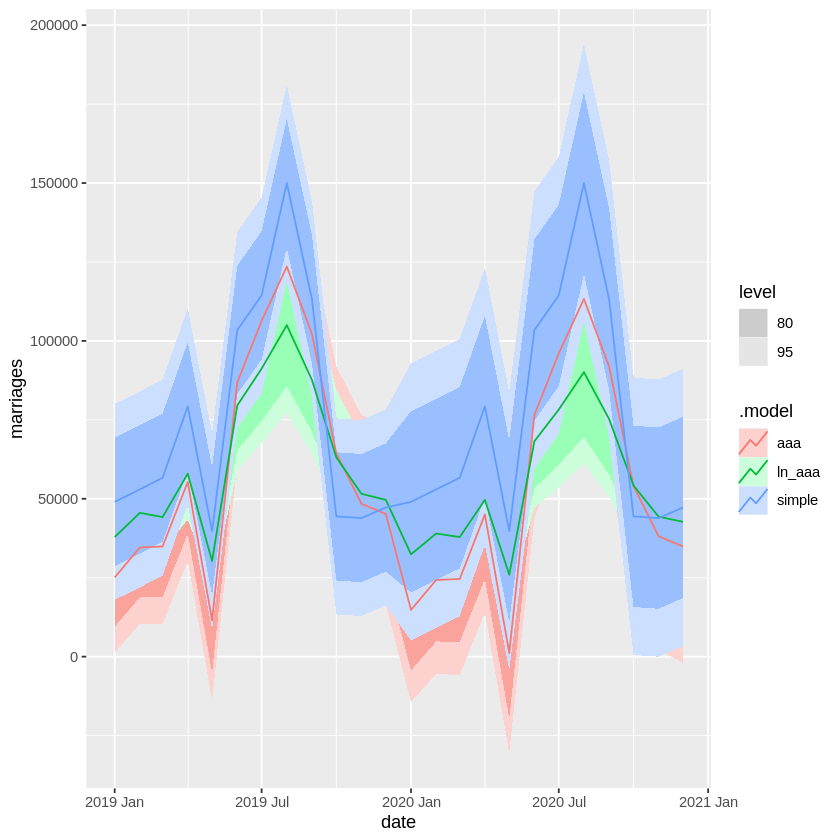

In [ ]:
autoplot(fcst)

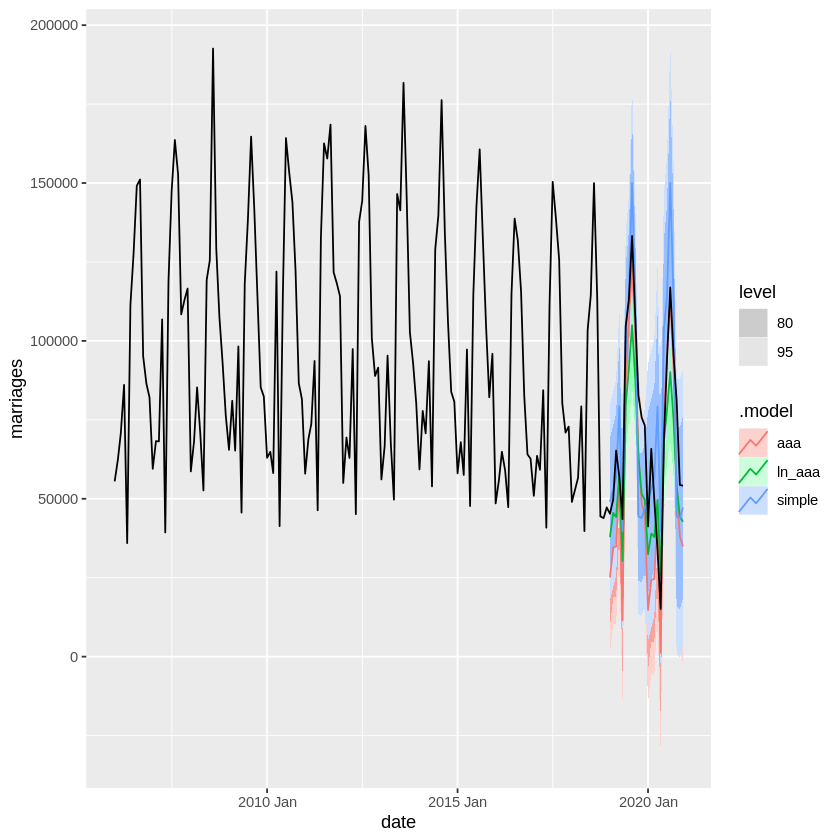

In [ ]:
autoplot(fcst, data)

In [ ]:
accuracy(fcst, data)

.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aaa,Test,15337.595,20188.51,17090.91,27.43368,31.34398,1.429920,1.274821,0.2311690
ln_aaa,Test,14149.109,18439.53,16467.41,14.90041,24.97978,1.377754,1.164380,0.4409405
simple,Test,-2811.792,21963.66,17539.96,-11.67545,31.98417,1.467489,1.386914,0.4490569
